# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/3108p\/Downloads/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Performing Visualizations

## Univariate Analysis

## Histplot


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

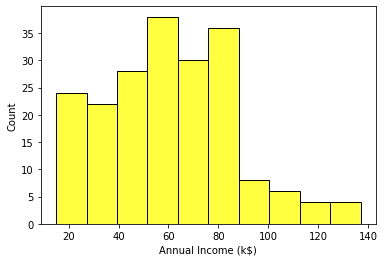

In [4]:
sns.histplot(data['Annual Income (k$)'], color="yellow")

# Box Plot

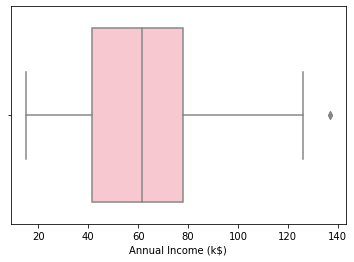

In [8]:
sns.boxplot(data['Annual Income (k$)'], color="pink")

import warnings
warnings.filterwarnings("ignore")

# Dist Plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

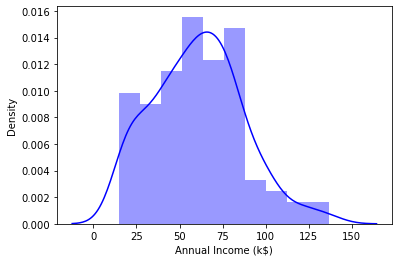

In [9]:
sns.distplot(data['Annual Income (k$)'], color="blue")

# Bi-variate Analysis

## Bar plot

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

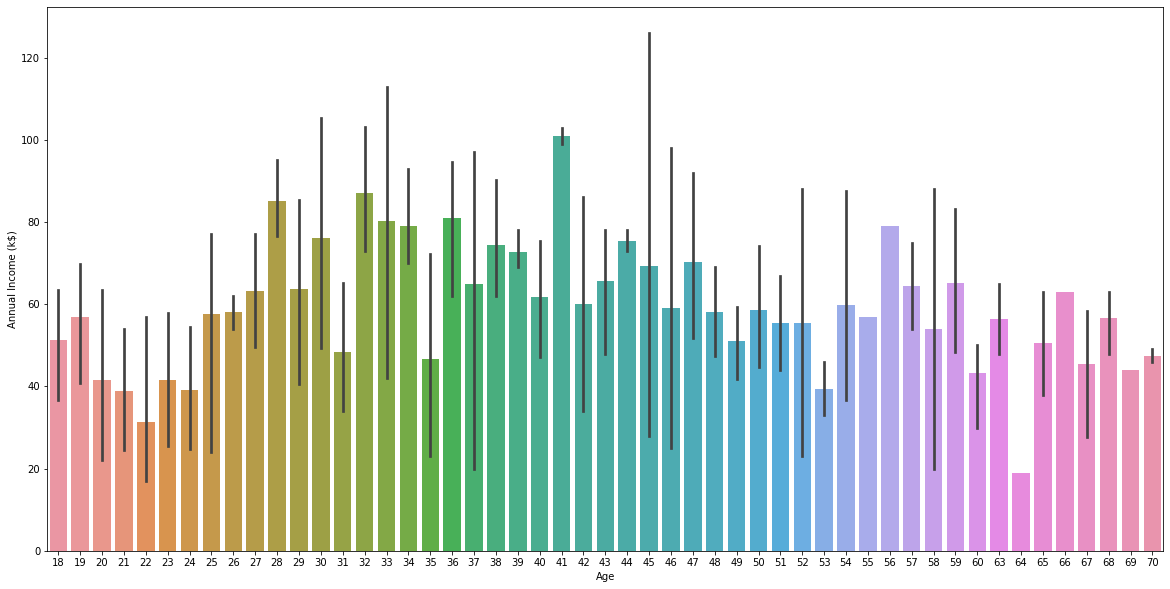

In [10]:
plt.figure(figsize=(20,10))
sns.barplot(data['Age'],data['Annual Income (k$)'])

# Line plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

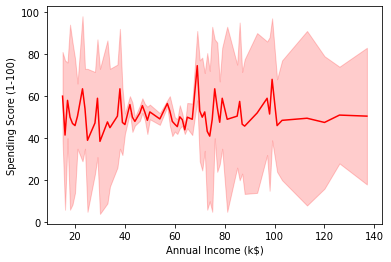

In [11]:
sns.lineplot(data['Annual Income (k$)'], data['Spending Score (1-100)'], color="red")

## Scatter plot (Age vs Spending Score)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

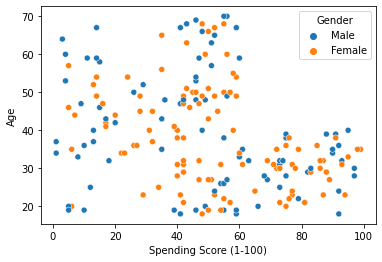

In [12]:
sns.scatterplot(data['Spending Score (1-100)'], data['Age'], hue = data['Gender'])

## Gender vs Age Distribution

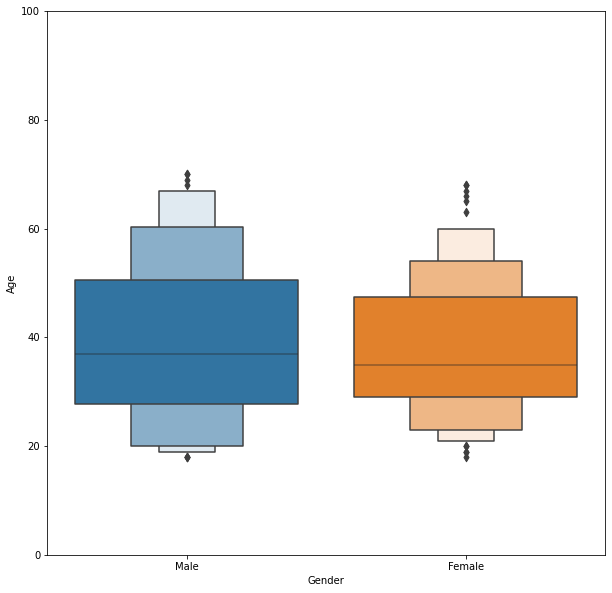

In [13]:
temp = pd.concat([data['Age'], data['Gender']], axis=1)

f, ax = plt.subplots(figsize=(10,10))
fig = sns.boxenplot(x='Gender', y="Age", data=data)
fig.axis(ymin=0, ymax=100);

#Genre -> Gender (Dataset in Kaggle had a typo)

## Annual Income vs Gender Countplot

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

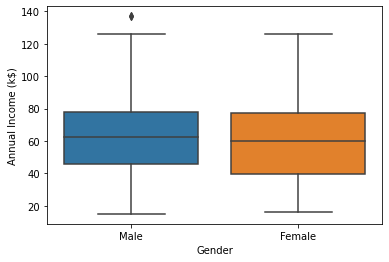

In [14]:
sns.boxplot(x=data['Gender'],y=data['Annual Income (k$)'])

## Multi-variate Analysis

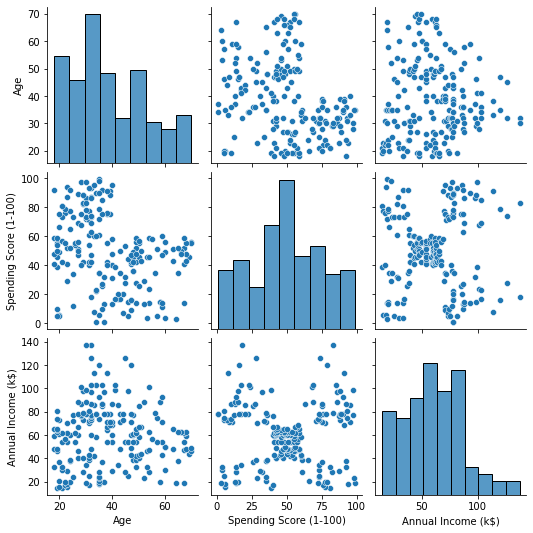

In [15]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

## Correlation between the different attributes

<AxesSubplot:>

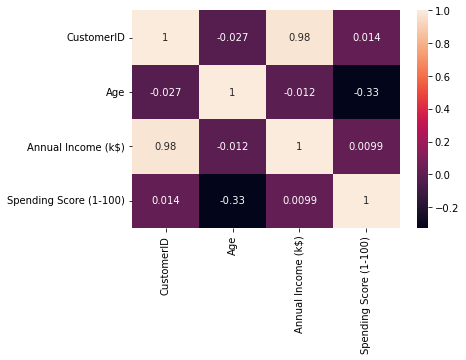

In [16]:
sns.heatmap(data.corr(),annot=True)

## Performing Descriptive Stats on the Dataset

In [17]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
data.shape

(200, 5)

## Checking for null values

In [20]:
data.isnull().any() #Inference: The dataset has no null values

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [21]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Finding the outliers and replacing them

In [22]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

## After removing outliers, boxplot will be like

{'whiskers': [<matplotlib.lines.Line2D at 0x187b5b84be0>,
 'caps': [<matplotlib.lines.Line2D at 0x187b5b961c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x187b5b84970>],
 'medians': [<matplotlib.lines.Line2D at 0x187b5b96760>],
 'fliers': [<matplotlib.lines.Line2D at 0x187b5b96a30>],
 'means': []}

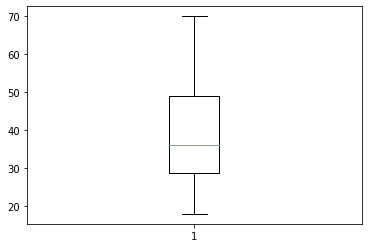

In [23]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x187b5be3d00>,
 'caps': [<matplotlib.lines.Line2D at 0x187b5bf22e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x187b5be3a30>],
 'medians': [<matplotlib.lines.Line2D at 0x187b5bf2880>],
 'fliers': [<matplotlib.lines.Line2D at 0x187b5bf2b50>],
 'means': []}

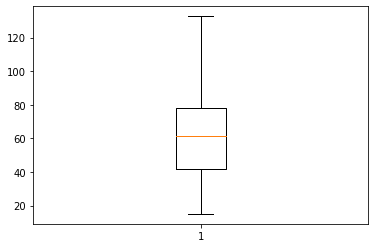

In [24]:
plt.boxplot(data['Annual Income (k$)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x187b5c44be0>,
 'caps': [<matplotlib.lines.Line2D at 0x187b5c541c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x187b5c44a00>],
 'medians': [<matplotlib.lines.Line2D at 0x187b5c54760>],
 'fliers': [<matplotlib.lines.Line2D at 0x187b5c54a30>],
 'means': []}

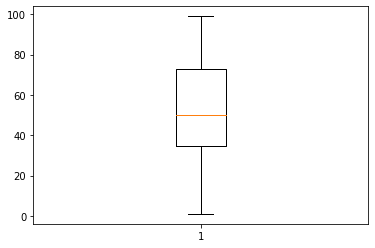

In [25]:
plt.boxplot(data['Spending Score (1-100)'])

## Checking for categorical columns and performing encoding

In [27]:

from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [28]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


# Scaling the data

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

## Performing any of the clustering algorithms

In [31]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([6, 6, 2, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 6, 2, 6, 3, 2, 6, 6,
       0, 6, 0, 6, 0, 6, 0, 2, 3, 2, 3, 6, 0, 2, 0, 2, 0, 2, 0, 6, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 6, 2, 3, 0, 3, 0, 3, 2, 3, 3, 6, 0, 0, 3, 6,
       0, 0, 6, 2, 3, 0, 0, 0, 3, 6, 0, 3, 2, 0, 3, 6, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 6, 3, 0, 2, 6, 0, 2, 3, 6, 2, 0, 3, 6, 3, 2, 0, 3, 3, 3,
       3, 2, 7, 6, 2, 2, 0, 0, 0, 0, 6, 7, 4, 1, 7, 4, 3, 1, 3, 1, 5, 1,
       7, 4, 5, 4, 7, 1, 5, 4, 7, 1, 7, 4, 5, 1, 3, 4, 7, 1, 5, 1, 7, 4,
       7, 4, 5, 4, 5, 4, 0, 4, 5, 4, 3, 4, 5, 4, 7, 1, 5, 1, 5, 1, 7, 4,
       3, 1, 3, 1, 7, 4, 5, 4, 7, 1, 7, 1, 7, 4, 7, 4, 5, 4, 7, 4, 7, 1,
       5, 1])

In [32]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [33]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,6
1,1.0,0.057692,0.000000,0.816327,6
2,0.0,0.038462,0.008493,0.051020,2
3,0.0,0.096154,0.008493,0.775510,2
4,0.0,0.250000,0.016985,0.397959,2


In [34]:
data1['kclus'].unique()

array([6, 2, 0, 3, 7, 4, 1, 5])

In [35]:
data1['kclus'].value_counts()

0    37
2    34
3    33
6    23
4    22
7    19
1    18
5    14
Name: kclus, dtype: int64

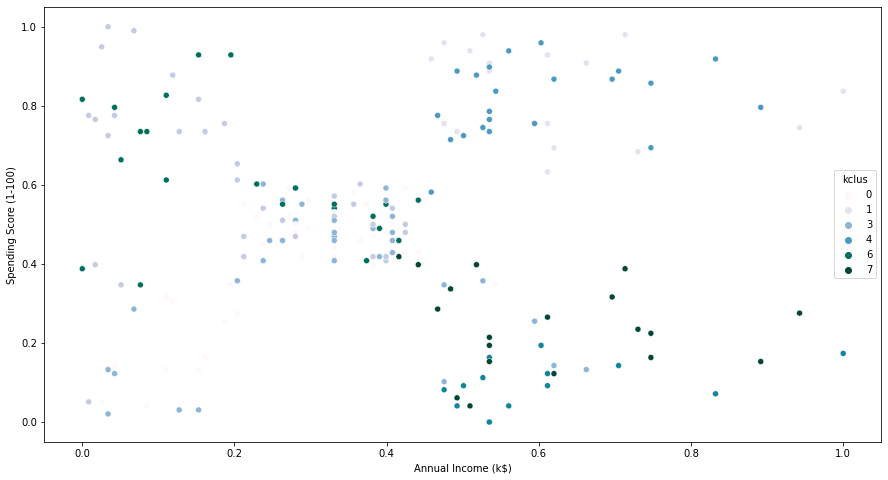

In [36]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [37]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [38]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,6
1,6
2,2
3,2
4,2


## Splitting dataset into train and test data

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [40]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [41]:
y_train.head()

,kclus
116,0
67,0
78,2
42,3
17,6


In [42]:
y_test.head()

,kclus
58,2
40,0
34,0
102,3
184,7


In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[3.14534828],
       [0.55274197],
       [2.16873057],
       [1.55294511],
       [3.60750126]])

## Measuring the performance using metrics

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score

In [46]:
mse = mean_squared_error(pred_test,y_test)
print("Mean squared error: ", mse)

Mean squared error:  3.7826164183646735


In [47]:
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

Root mean squared error:  1.944894963324414


In [48]:
mae = mean_absolute_error(pred_test,y_test)
print("Mean absolute error: ", mae)

Mean absolute error:  1.6495343087845113


In [49]:
acc = lr.score(x_test,y_test)
print("accuracy: ", acc)

accuracy:  0.21286594762353594
